<a href="https://colab.research.google.com/github/jgreg4/ML_Projects_ImageClassify/blob/main/ML_Problems_ImageClassification_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
__Building Image Dataset Tutorial__

by J. Griego

This tutorial describes the process to build your own mini dataset (1250 images) from scratch. The image dataset here is composed of camera trap images of animals (deer, puma, elk, coyote, and bear).

---

<details>
  <summary>To assemble your own dataset (option 1):</summary>

---
To assemble a dataset, take the following steps:
  * Build dataset from camera trap repos
    * Dataset description
      * collect full resolution images that clearly show your class of interest
    * When sourcing images
      * find images that are public domain
    * This tutorial: 5 animal classes of interest (deer, puma, elk, coyote, bear)
      * keep separate folders of color images vs gray type images
        * if you keep a balanced number of color vs gray images you don't need separate folders (keeping separate folders helps with tracking the count of each)
      * doing this lead to 10 different class folders '0' - '9'
    * Number of images:
      * collected ~ 125 unique images for each class
        * ideally there would be more numbers per class but the low number is due to time limitations and the repo only containing enough images for 125 gray puma and 125 color puma image types
        * potential for growth/future work could be to add more images from new sources
          * this could be done by simply adding more images to the google drive folders
      * 100 training images per class (80%)
      * 12 validation images per class (10%)
      * 13 testing images per class (10%)
      * this is a tiny dataset (but works for tutorial purposes), for instance ImageNet contains ~1000 images per class
  * Database folder structure:
    * Dataset_image/train/
      * class_0
        * 0001.jpg
        * ...
        * 0100.jpg
      * ...
      * class_9
        * 0001.jpg
        * ...
        * 0100.jpg
    * Dataset/val/
      * class_0
        * 0001.jpg
        * ...
        * 0012.jpg
      * ...
      * class_9
        * 0001.jpg
        * ...
        * 0012.jpg
    * Dataset/test/
      * class_0
        * 0001.jpg
        * ...
        * 0013.jpg
      * ...
      * class_9
        * 0001.jpg
        * ...
        * 0013.jpg
  * Class naming description (i.e. output labels)
    * class_0 : deer color image
    * class_1 : deer gray image
    * class_2 : puma color image
    * class_3 : puma gray image
    * class_4 : elk color image
    * class_5 : elk gray image
    * class_6 : coyote color image
    * class_7 : coyote gray image
    * class_8 : bear color image
    * class_9 : bear gray image
---
Example of image repos/sources:
* Image Source 1: eMammal camera trap research project
  * link: https://emammal.si.edu/
  * search an animal class name ('deer') and save images as *.jpg or similar
* Image Source 2: US Fish and Wildlife Service
  * link: https://www.fws.gov/search/images?$keywords=%22deer%22
  * the above searches for images of 'deer'
* Image Source 3: US National Park Service
  * link: https://www.nps.gov/media/multimedia-search.htm#sort=score+desc&q=deer
* This tutorial's dataset is located here for ease and further inspection:
  * link:  https://drive.google.com/file/d/1b4qNCZsIsA7PIqKzGWuveq9wHYhw9VXp/view?usp=drive_link
  * Dataset and Video size (so far): 1.07 GB
    * Google Drive has 15 GB capacity for free-tier
---
Other image selection notes/tips:
  * Do not mix gray and color type images in the same folder unless you have an equal balance between the two types
  * Do not use images collected from video frames (there is not enough variation to adequately train the model between sequential frames)
    * A separate model that learns from only video frames can be completed by using ~10 different videos as the training, validation, and test data
  * Keep a separate folder for each training, validation, and test image set
  * If you decide to perform image transformations, treat all transformed images as the same class that they originated from (do not mix training and validation and/or test)
    * You do not want transformed images in both the training set and testing set (keeping separate folders will prevent this)
---
</details>

<details>
  <summary>To borrow/download a dataset (option 2 or 3):</summary>

* This method is not recommended for this tutorial since the datasets (Caltech and ImageNet) are too large for a standard Google Drive upload.
  * Google Drive has 15 GB capacity for free-tier
* These options are just included for awareness.
---       
  * Download from Caltech Camera Traps (option 2)
    * Full resolution images
    * Dataset size: ~ 105 GB
      * This is too large for a tutorial
    * https://lila.science/datasets/caltech-camera-traps
---
  * Download from ImageNet (option 3)
    * Images scaled to 64 x 64
    * Dataset size: ~ 12.5 GB (unscaled dataset is ~1.08 TB)
      * This is too large for a tutorial
    * link: https://image-net.org/download.php
---
</details>

<details>
  <summary>To setup Google Drive with the assembled dataset:</summary>

Now that the dataset has been assembled, here is some example code to get the dataset ready for example image viewing.
* Login to your google account (create one if you haven't already)
  * https://workspace.google.com/products/drive/
* Click 'Sign in' button
* Click on 'My Drive'
* Assuming you have set up your database folder structure according to the guidlines above, you can drag and drop your main folder into 'My Drive'
* Otherwise do the following (this is not recommended since this will create a lot more work than just a simple drag and drop of your dataset folder):
  * Right-click and select 'New folder'
    * Create a folder called 'Dataset_image'
      * Within 'Dataset_image' you should create these separate folders
        * train
        * val
        * test
          * each of the above folders will contain:
            * class\_0
            * class\_1
            * class\_2
            * class\_3
            * class\_4
            * class\_5
            * class\_6
            * class\_7
            * class\_8
            * class\_9
---
</details>

In [21]:
# The following is to allow access to datasets that have been saved on google drive
from google.colab import drive
drive.mount('/content/drive')

# load necessary libraries for plotting etc
import zipfile
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
#import torchvision
#import itertools


zip_file_path = '/content/drive/My Drive/Dataset_images.zip'
extracted_database = '/content/Dataset_images/'

# Process to see if the database is loaded already. If not, unzip the file and load the database.
if not os.path.exists(extracted_database):
    os.makedirs(extracted_database)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_database)
    print(f"Images extracted to {extracted_database}")
else:
    print(f"Database {extracted_database} already exists, no need to extract.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Database /content/Dataset_images/ already exists, no need to extract.


---
__A quick look at a test image__

* The section immediately below is a brief code example to display images of the puma dataset
  * this is the $1^{st}$ image of the puma test dataset (0001.jpg)
* A quick look at the assembled dataset with a program such as FIJI showed that there is a variety of different image sizes
  * approx largest: 4000 x 3000 pixels
  * approx smallest: 130 x 130 pixels
  * there could be larger or smaller within the entire dataset
  * this must be addressed with a preprocessing step to ensure an image size of 224 x 224 for effective uniformity between different transfer learning models etc.
* The generic description of the input dataset size for training (assuming color rgb) would be the following:
  * 1000 x 3 x 224 x 224
  * number of images, rgb color channels, pixel height, pixel width
  * the validation set would have 120 for the first value
  * the test set would have 130 for the first value
---

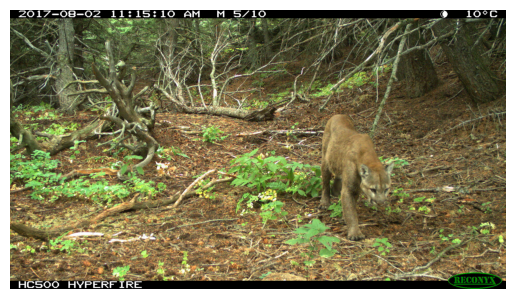

In [22]:
# Set path to image database within google colab
image_example_path = '/content/Dataset_images/Dataset_images/test/class_2/0001.jpg'
img = Image.open(image_example_path)

# Show the example image
plt.imshow(img)
plt.axis('off')
plt.show()

Read in full dataset:

In [23]:
# Set the dataset path within google drive
dataset_path = '/content/Dataset_images/Dataset_images'

# Training set transforms for image conversion and augmentation since small dataset
# transforms could include resize, crop, vertical flip, horizontal flip, rotation, image color changes based on what is commented out
train_transform = transforms.Compose([
    transforms.Resize((256, 256)), # resize to 256 x 256, this is above 224 to allow for cropping in next step
    transforms.CenterCrop(224), # this allows for cropping of edge labels and ensures correct size
    #transforms.RandomVerticalFlip(), # random vertical transform
    #transforms.RandomHorizontalFlip(), # random horizontal transform
    #transforms.RandomRotation(30), # random rotation within -30 to +30 degrees
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1), # random color modification
    transforms.ToTensor(), # conversion to tensor - required for training
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet Mean and Standard Deviation default
])

# Validation and Test set transforms for image conversion
val_test_transform = transforms.Compose([
    transforms.Resize((256, 256)), # resize to 256 x 256, this is above 224 to allow for cropping in next step
    transforms.CenterCrop(224), # this allows for cropping of edge labels and ensures correct size
    transforms.ToTensor(), # conversion to tensor - required for training
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet Mean and Standard Deviation default
])

# Load training, validation, and test sets using ImageFolder
train_data = datasets.ImageFolder(
    root=f'{dataset_path}/train',
    transform=train_transform # apply transforms
)
val_data = datasets.ImageFolder(
    root=f'{dataset_path}/val',
    transform=val_test_transform # apply resize and potentially normalization
)
test_data = datasets.ImageFolder(
    root=f'{dataset_path}/test',
    transform=val_test_transform # apply resize and potentially normalization
)

# Create DataLoader for batching
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Get the size (number of images) of the training, validation, and test datasets
train_size = len(train_data)
val_size = len(val_data)
test_size = len(test_data)

# Print the sizes
print(f"Training size: {train_size}")
print(f"Validation size: {val_size}")
print(f"Test size: {test_size}")

Training size: 1000
Validation size: 120
Test size: 130


Image Size (num channels, pixel height, pixel width): torch.Size([3, 224, 224])


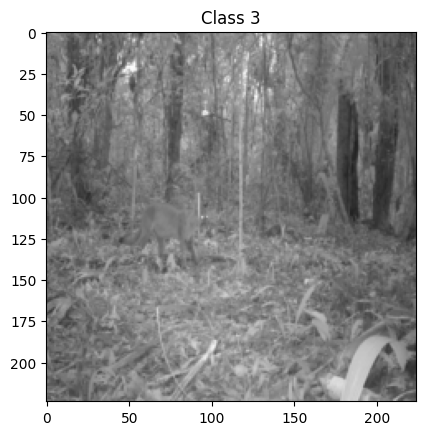

In [26]:
# adapted from pytorch tutorial transfer learning: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    #mean = np.array([0.485, 0.456, 0.406])
    #std = np.array([0.229, 0.224, 0.225])
    #inp = std * inp + mean
    #inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# get a single image (first image from the batch)
image = images[1]
label = labels[1]

# print the image size
print(f"Image Size (num channels, pixel height, pixel width): {image.shape}")

# plot the image
imshow(image, title=f"Class {label.item()}")

---
__Model Description Tutorial__

Provide sufficient information to access all elements of the model:

* Load a model Give Python code of how to load a pretrained model. You may want to use wget from a GitHub account.
* Save a model Give Python code of how to save your model.
* Number of parameters You can give a command that prints how many.
* Input layer Demonstrate compatibility with the dataset tutorial.
* Output layer How many outputs? What are the activation functions? How do we train the model? What is the loss function? Do you use cross-entropy, mean squared error? What is it?
* Intermediate layers Is the model using CNNs? Is it LSTM? Is it ResNet? Give a brief description of intermediate layers. You can reuse images from the reference papers. If small, print the entire model. Else, describe major parts of the model.
---

---
__Model Optimization Tutorial__

Provide sufficient information to show how to fine- tune a model:

* Loss function Specify the loss function (as in the model description).
* Optimization algorithm Give the name. Is it Adams? Which one. Give basic parameters of the optimization algorithm.
* Learning rate Give initial learning rate. If you adjust it, explain how.
* Batch size Give the number of audio, images, or videos that are used in each batch.
* Number of epochs Provide the maximum number of epochs. Are you using early stopping?
---

---
__Basic Testing Tutorial__

* Load the pre-trained model using wget to download it and run it on one test example.
---

---
__Basic fine-tuning Tutorial__

* Download a pre-trained model, setup the optimization loop, and show that the loss function is getting reduced. Retrain the pre-trained model for a few iterations to demonstrate the optimization process.
---

---
__Full training Tutorial__

* Run the loop multiple times and show that the validation and testing losses converge to a good number. If the losses do not converge, you will need to add data augmentation.
---

---
__Help Links__

* PyTorch
  * General Tutorials:
    * https://pytorch.org/tutorials/
  * Image Transforms:
    * https://pytorch.org/vision/stable/transforms.html
  * Transfer Learning:
    * https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
* Scikit-Learn Examples
  * https://scikit-learn.org/stable/auto_examples/index.html
* Ultralytics YOLO Docs
  * https://docs.ultralytics.com/
---